In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数の追加
df['MEDV'] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# ライブラリーのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df.iloc[:, 13], test_size=0.2, random_state=2)

#データを標準化
sc = StandardScaler()
sc.fit(x_train) #学習用データで標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [3]:
# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# ライブラリーのインポート
from ngboost import NGBRegressor

# モデルの学習
ngb = NGBRegressor()
ngb.fit(x_train_std, y_train)

# 予測　
pred_ngb = ngb.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_ngb = r2_score(y_test, pred_ngb)

# 平均絶対誤差(MAE)
mae_ngb = mean_absolute_error(y_test, pred_ngb)

print("R2 : %.3f" % r2_ngb)
print("MAE : %.3f" % mae_ngb)

# 変数重要度
print("feature_importances = ", ngb.feature_importances_)

[iter 0] loss=3.6377 val_loss=0.0000 scale=1.0000 norm=6.6433
[iter 100] loss=2.7355 val_loss=0.0000 scale=2.0000 norm=5.1141
[iter 200] loss=2.1841 val_loss=0.0000 scale=2.0000 norm=3.4826
[iter 300] loss=1.9234 val_loss=0.0000 scale=1.0000 norm=1.5236
[iter 400] loss=1.7831 val_loss=0.0000 scale=1.0000 norm=1.4034
R2 : 0.907
MAE : 2.062
feature_importances =  [[0.07588267 0.00328558 0.03699842 0.01478072 0.05175605 0.20300705
  0.06818089 0.1485193  0.02097271 0.06867837 0.06293459 0.07628448
  0.16871917]
 [0.08345884 0.0045023  0.0462554  0.00653855 0.04571964 0.22050098
  0.05569453 0.14333455 0.02893396 0.07247978 0.07425393 0.08485425
  0.1334733 ]]


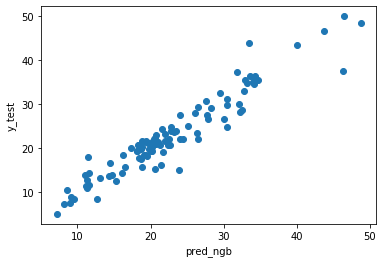

In [4]:
# ライブラリーのインポート
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("pred_ngb")
plt.ylabel("y_test")
plt.scatter(pred_ngb, y_test)

plt.show()